# Практическая работа №3

## 1-8. Датасет insurance

### 1. Загрузка датасета

In [2]:
# Загрузка необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

In [3]:
# Загрузка датасета
data = pd.read_csv('../data/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Объяснение столбцов по данным https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

* `age` - Возраст основного получателя
* `sex` - Пол страхового подрядчика, женщина / мужчина
* `bmi` - Индекс массы тела, позволяющий получить представление о теле, относительно высоком или низком весе по отношению к росту, объективный индекс массы тела (кг / м2) с использованием отношения роста к весу, в идеале от 18,5 до 24,9.
* `children` - Количество детей, охваченных медицинским страхованием / Количество иждивенцев
* `smoker` - Курильщик / некурящий
* `region` - Район проживания получателя в США, северо-восток, юго-восток, юго-запад, северо-запад.
* `charges` - Индивидуальные медицинские расходы, оплачиваемые медицинским страхованием.

### 2. Статистика по данным

In [4]:
# С помощью метода describe() посмотреть статистику по данным.
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Выводы по данным:
* Средний возраст выборки - 39 лет, стандартное отклонение - 14 лет
* Средний ИМТ - 30,6 (выше нормы на 5,6 единиц)
* У застрахованных лиц в среднем 1 ребёнок/иждивенец охваченный страхованием
* В среднем, страховка покрывает $13k медицинских расходов со стандартным отклонением $12k
* Минимальный размер покрываемых страховкой медицинских расходов $1,1k, максимальная - $63k

### 3. Гистограммы числовых показателей

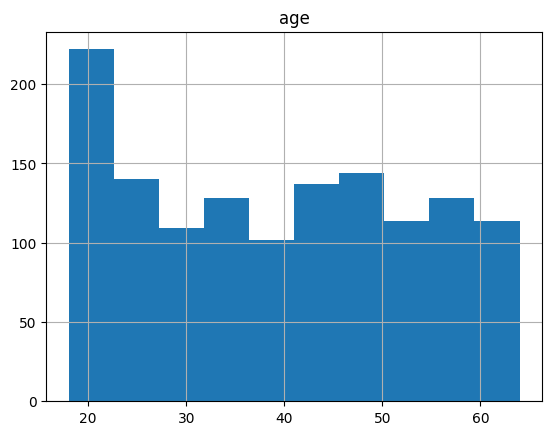

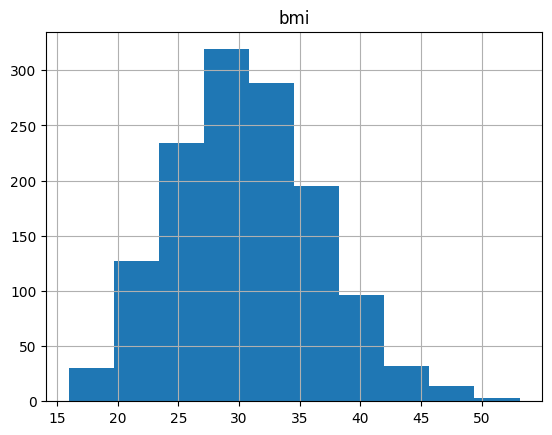

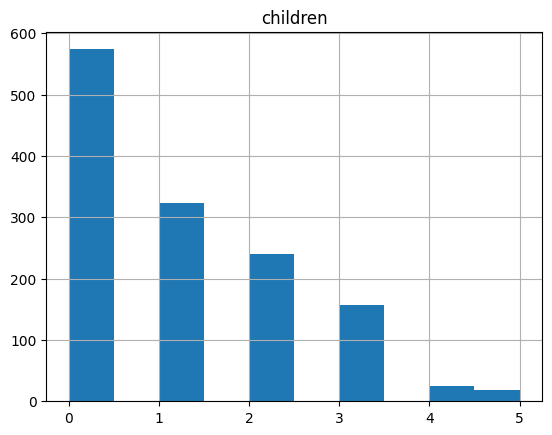

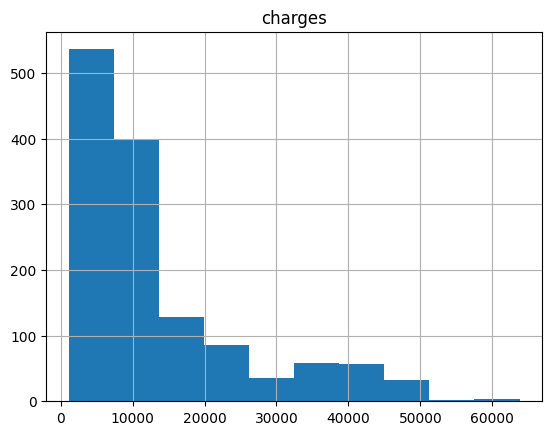

In [5]:
# Построить гистограммы для числовых показателей.
numeric_columns = ['age', 'bmi', 'children', 'charges']
for col in numeric_columns:
    data.hist(column=col)

Выводы по распределениям:
* Распределение по возрастам почти равномерное, но есть группа людей возраста 20 лет, которых в ~2 разра больше людей других возрастов
* Распределение ИМТ визуально похоже на нормальное
* Больше всего застрахованных лиц не имеют покрытых страховкой детей/иждивенцев
* Количество дорогих страховок значительно меньше, чем дешёвых

### 4. Меры центральной тенденции и меры разброса

In [29]:
# Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges)
# Меры центральной тенденции
central_trend_measures: dict[str, dict[str, float]] = {}
for column in ('bmi', 'charges'):
    mean = np.mean(data[column])
    median = np.median(data[column])
    mode = sts.mode(data[column])
    central_trend_measures[column] = {'mean': mean, 'median': median, 'mode': mode.mode}
    print(column)
    print(f' mean: {mean}\n median: {median}\n mode: {mode}')
    print()

bmi
 mean: 30.66339686098655
 median: 30.4
 mode: ModeResult(mode=32.3, count=13)

charges
 mean: 13270.422265141257
 median: 9382.033
 mode: ModeResult(mode=1639.5631, count=2)



In [9]:
# Меры разброса
scatter_measures: dict[str, dict[str, float]] = {}
for column in ('bmi', 'charges'):
    std = data[column].std()
    amplitude = data[column].max() - data[column].min()
    iqr = sts.iqr(data[column], interpolation='midpoint')
    scatter_trend_measures = {'std': std, 'amplitude': amplitude, 'iqr': iqr}
    print(column)
    print(f' std: {std}\n amplitude: {amplitude}\n iqr: {iqr}')
    print()

bmi
 std: 6.098186911679014
 amplitude: 37.17
 iqr: 8.384999999999998

charges
 std: 12110.011236694001
 amplitude: 62648.554110000005
 iqr: 11879.80148



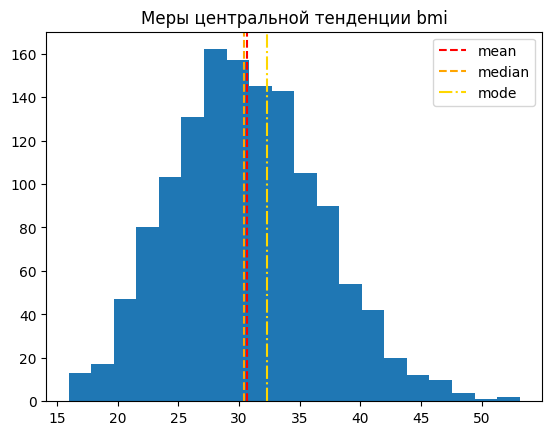

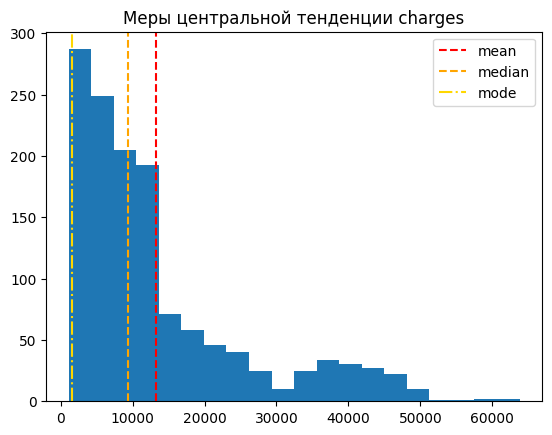

In [35]:
# Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии). 
# Добавить легенду на графики.
for column in ('bmi', 'charges'):
    plt.title(f'Меры центральной тенденции {column}')
    plt.hist(x=data[column], bins=20)
    plt.axvline(
        x=central_trend_measures[column]['mean'],
        color='red',
        linestyle='--',
        label='mean'
    )
    plt.axvline(
        x=central_trend_measures[column]['median'], 
        color='orange', 
        linestyle='--', 
        label='median'
    )
    plt.axvline(
        x=central_trend_measures[column]['mode'], 
        color='gold', 
        linestyle='-.', 
        label='mode'
    )
    plt.legend()
    plt.show()

Выводы:
* Для распределения `bmi`, близкого к нормальному, все три метрики центральной тенденции находятся рядом друг с другом в центре графика
* Для распределения `charges`, имеющего явный перекос влево, метрики центральной тенденции расходятся 

### 5. Box-plot для числовых показателей

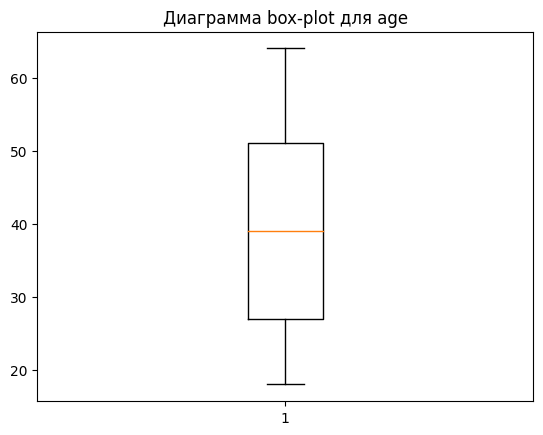

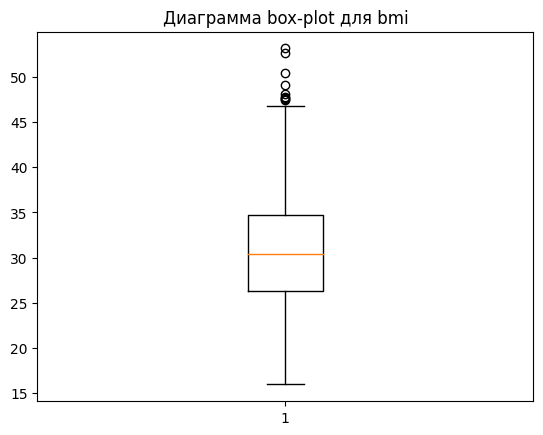

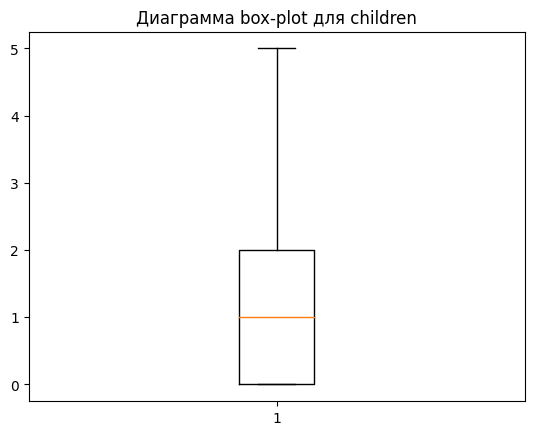

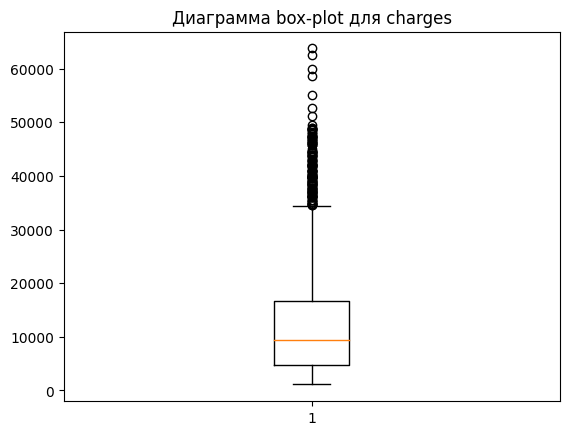

In [37]:
# Построить box- для числовых показателей.
# Названия графиков должны соответствовать названиям признаков.
for column in numeric_columns:
    plt.boxplot(data[column])
    plt.title(f'Диаграмма box-plot для {column}')
    plt.show()

Выводы:
* Переменная возраста распределена равномерно и не имеет выбросов
* У переменной ИМТ есть выбросы для больших значений. Распределение перекошено в сторону небольших значений ИМТ
* Переменная количество детей перекошена к нулевому значению и не имеет выбросов
* Переменная расходов перекошена к малым значениям и имеет выбросы для больших значений 

### 6. Проверка центральной предельной теоремы

In [ ]:
# Используя признак charges или imb, проверить, выполняется ли центральная предельная теорема. 

In [55]:
# Использовать различные длины выборок n. Количество выборок = 300.
n_samples = 300
samples_mean_dict: dict[int, pd.Series] = {}
samples_means_mean: dict[int, float] = {}
for i in range(10, 51, 20):
    samples_means = pd.Series(
        [
            data['bmi'].sample(n=i).mean() 
            for _ in range(n_samples)
        ], 
        dtype='float'
    )
    samples_mean_dict[i] = samples_means
    samples_means_mean[i] = samples_means.mean()


In [56]:
# Найти стандартное отклонение и среднее для полученных распределений.
for i in samples_mean_dict.keys():
    print(f'smaple len: {i}')
    print(f' std: {samples_mean_dict[i].std()}')
    print(f' mean: {samples_mean_dict[i].mean()}')

smaple len: 10
 std: 1.8593795427805815
 mean: 30.520551666666663
smaple len: 30
 std: 1.1455777652647787
 mean: 30.627126666666662
smaple len: 50
 std: 0.8642658527318594
 mean: 30.649057


In [51]:
print('total values:')
print(f' std: {data["bmi"].std()}')
print(f' mean: {data["bmi"].mean()}')
real_mean = data['bmi'].mean()

total values:
 std: 6.098186911679014
 mean: 30.66339686098655


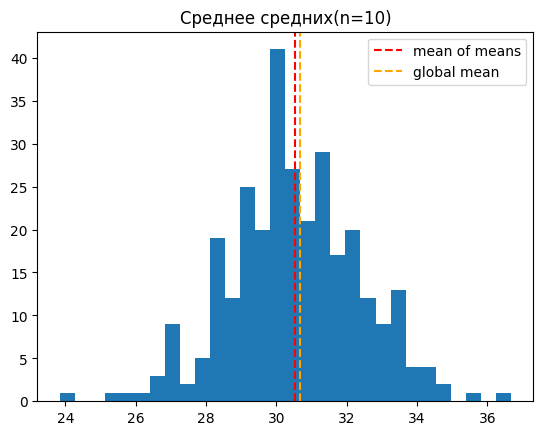

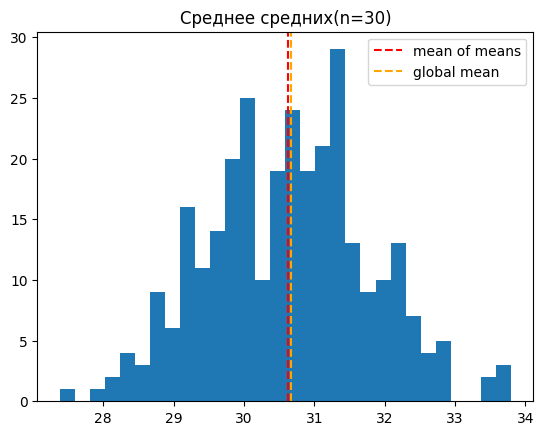

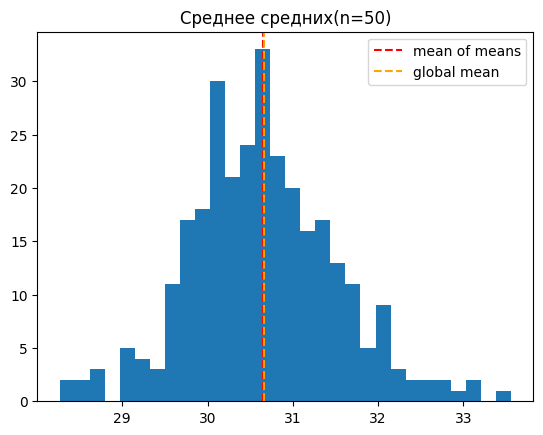

In [57]:
# Вывести результат в виде гистограмм.
for i, sample_means in samples_mean_dict.items():
    plt.hist(x=sample_means, bins=30)
    plt.title(f'Среднее средних(n={i})')
    plt.axvline(
        x=sample_means.mean(),
        color='red',
        linestyle='--',
        label='mean of means'
    )
    plt.axvline(
        x=real_mean, 
        color='orange', 
        linestyle='--', 
        label='global mean'
    )
    plt.legend()
    plt.show()

Выводы:
* Чем больше n, тем ближе среднее средних по выборкам к среднему генеральной совокупности
* Центральная предельная теорема выполняется на данном распределении

### 7. Доверительные интервалы для средних значений

In [61]:
# Построить 95% и 99% доверительный интервал для среднего значения расходов 
# и среднего значения индекса массы тела.

# Далее рассчитаем доверительный интервал, нижняя граница = 𝑥̅−1,96 𝑆𝐸, верхняя граница 𝑥̅+1,96 𝑆𝐸.
# Так же мы можем рассчитать 99% доверительный интервал, 
# где нижняя граница = 𝑥̅−2.58 𝑆𝐸, верхняя граница 𝑥̅+2.58 𝑆𝐸, такой интервал будет шире.

confidence_intervals: dict[str, dict[int, tuple[float, float]]] = {}
intervals_multipliers = {95: 1.96, 99: 2.58}
for column in ('bmi', 'charges'):
    error = data[column].sem()
    mean = data[column].mean()
    intervals = {}
    for percent, multiplier in intervals_multipliers.items():
        interval = (mean - error * multiplier, mean + error * multiplier)
        intervals[percent] = interval
    confidence_intervals[column] = intervals


In [69]:
for column, intervals in confidence_intervals.items():
    print(f'intervals for {column}')
    for percent, interval in intervals.items():
        print(f' {percent}%: ({interval[0]:.4f}, {interval[1]:.4f})')

intervals for bmi
 95%: (30.3366, 30.9902)
 99%: (30.2333, 31.0935)
intervals for charges
 95%: (12621.5301, 13919.3145)
 99%: (12416.2682, 14124.5763)


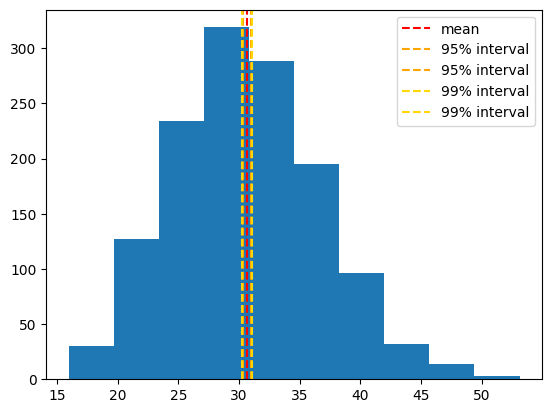

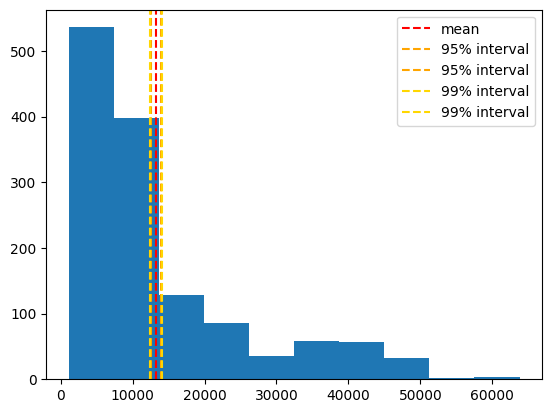

In [71]:
interval_colors = {95: 'orange', 99: 'gold'}
for column, intervals in confidence_intervals.items():
    plt.hist(x=data[column])
    plt.axvline(
        x=data[column].mean(), 
        color='red', 
        linestyle='--', 
        label='mean'
    )
    for percent, interval in intervals.items():
        for border in interval:
            plt.axvline(
                x=border, 
                color=interval_colors[percent], 
                linestyle='--', 
                label=f'{percent}% interval'
            )
    plt.legend()
    plt.show()

### 8. Проверка признаков на нормальность

In [ ]:
import statsmodels.api as sm

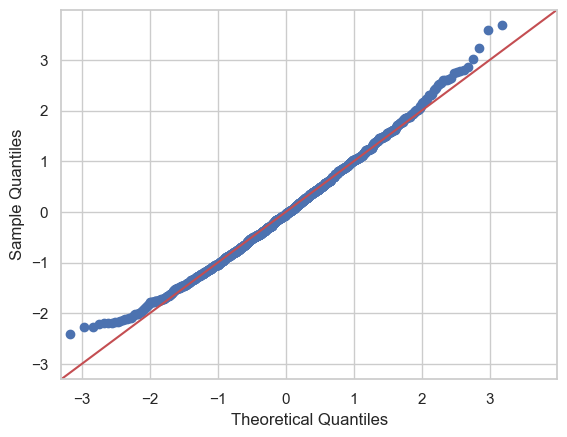

KS-test for bmi: KstestResult(statistic=0.02613962682509635, pvalue=0.31453976932347394, statistic_location=-0.27697218531780776, statistic_sign=1)
p-value = 0.31453976932347394
H0: bmi has normal distribution


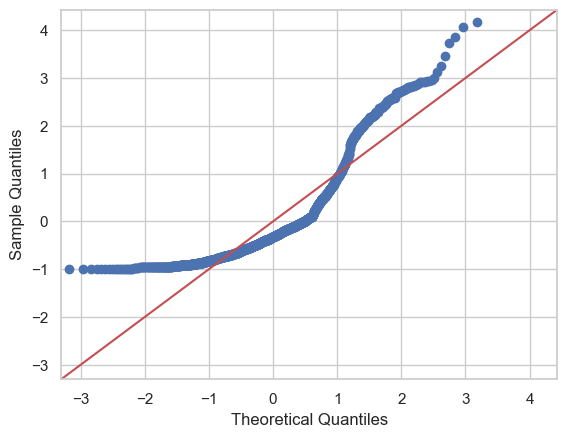

KS-test for charges: KstestResult(statistic=0.18846204110424236, pvalue=4.393057307685022e-42, statistic_location=0.016557596433631947, statistic_sign=1)
p-value = 4.393057307685022e-42
H1: charges has not normal distribution


In [87]:
# Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы.
# Сформулировать нулевую и альтернативную гипотезы. 
# Для каждого признака использовать KS-тест и q-plot. 
# Сделать выводы на основе полученных p-значений.

for column in ('bmi', 'charges'):
    stadartized = sts.zscore(data[column])
    test_ks = sts.kstest(stadartized, 'norm')

    fig = sm.qqplot(stadartized, line='45')
    plt.show()

    print(f'KS-test for {column}: {test_ks}')
    print(f'p-value = {test_ks.pvalue}')
    if test_ks.pvalue < 0.05:
        print(f'H1: {column} has not normal distribution')
    else:
        print(f'H0: {column} has normal distribution')

Выводы:
* Для переменной `bmi` p-значение = `0.31`, следовательно гипотезу о нормальном распределении мы отвергнуть не можем
* Для переменнной `charges` р-значение = `4.4e-42`, следовательно гипотезу о нормальном распределении мы отвергаем

## 9-12. Датасет ECDCCases

### 9. Загрузка датасета

In [3]:
# Загрузка датасета
data = pd.read_csv('../data/ECDCCases.csv')
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
...,...,...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


Объяснение столбцов по данным https://learn.microsoft.com/ru-ru/azure/open-datasets/dataset-ecdc-covid-cases?tabs=azure-storage

* `date_rep` - Дата отчета.
* `day` - День месяца
* `month` - Номер месяца.
* `year` - Год
* `cases` - Число зарегистрированных случаев.
* `deaths` - Число зарегистрированных летальных случаев.
* `countries_and_territories` - Название страны или территории.
* `geo_id` - Географический идентификатор.
* `country_territory_code` - Название страны или территории.
* `continent_exp` - Название континента.

### 10. Обработка пропущенных значений

In [6]:
data.isna().sum().sort_values()


dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
continentExp                                                     0
countryterritoryCode                                           123
popData2019                                                    123
geoId                                                          275
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [7]:
# Вывести количество пропущенных значений в процентах.
data.isna().sum().apply(lambda x: x / len(data)).sort_values()

dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
continentExp                                                  0.000000
countryterritoryCode                                          0.001987
popData2019                                                   0.001987
geoId                                                         0.004442
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    0.046507
dtype: float64

In [8]:
# Удалить два признака, в которых больше всех пропущенных значений.
data.drop(
    columns=['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'geoId'],
    inplace=True,
)
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZWE,14645473.0,Africa
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZWE,14645473.0,Africa


In [12]:
# Для оставшихся признаков обработать пропуски: 
# для категориального признака использовать заполнение значением по умолчанию (например, « »), 
data['countryterritoryCode'] = data['countryterritoryCode'].fillna('not stated')

In [13]:
# для числового признака использовать заполнение медианным значением.
median_pop_data = data['popData2019'].median()
data['popData2019'] = data['popData2019'].fillna(median_pop_data)

In [14]:
# Показать, что пропусков больше в данных нет.
data.isna().sum().apply(lambda x: x / len(data)).sort_values()

dateRep                    0.0
day                        0.0
month                      0.0
year                       0.0
cases                      0.0
deaths                     0.0
countriesAndTerritories    0.0
countryterritoryCode       0.0
popData2019                0.0
continentExp               0.0
dtype: float64

### 11. Анализ признаков на выбросы

In [15]:
# Посмотреть статистику по данным, используя describe().
data.describe()

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.091909e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529798e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


Выводы:
* Столбцы `day`, `month` и `year` не содержат выбросов и лежат в ожидаемых диапазонах
* Стобец `cases` при среднем `1155.07`, стандартном отклонении `6779.01` и интервале значений `(-8261, 234633)` явно имеет выбросы
* Стобец `deaths` при среднем `26.05`, стандартном отклонении `131.22` и интервале значений `(-1918, 4928)` явно имеет выбросы
* Стобец `popData2019` при среднем `4.091909e+07`, стандартном отклонении `1.529798e+08` и интервале значений `(8.150000e+02, 1.433784e+09)` явно имеет выбросы 

In [20]:
# Посмотреть, для каких стран количество смертей в день превысило 3000 и сколько таких дней было.
data[data['deaths'] > 3000].groupby(by=['countriesAndTerritories']).size()

countriesAndTerritories
Argentina                   1
Ecuador                     1
Mexico                      1
Peru                        2
United_States_of_America    6
dtype: int64

### 12. Удаление дублирующихся данных

In [24]:
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZWE,14645473.0,Africa
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZWE,14645473.0,Africa


In [25]:
# Найти дублирование данных.
data[data.duplicated()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
218,12/05/2020,12,5,2020,285,2,Afghanistan,AFG,38041757.0,Asia
48010,29/05/2020,29,5,2020,0,0,Saint_Lucia,LCA,182795.0,America
48073,28/03/2020,28,3,2020,0,0,Saint_Lucia,LCA,182795.0,America


In [27]:
# Удалить дубликаты.
data = data.drop_duplicates()
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia
5,10/12/2020,10,12,2020,202,16,Afghanistan,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZWE,14645473.0,Africa
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZWE,14645473.0,Africa


## 13. Датасет bmi

In [28]:
# Загрузить данные из файла “bmi.csv”.
data = pd.read_csv('../data/bmi.csv')
data

,bmi,region
0,22.705,northwest
1,28.880,northwest
2,27.740,northwest
3,25.840,northwest
4,28.025,northwest
...,...,...
645,20.600,southwest
646,38.600,southwest
647,33.400,southwest
648,44.700,southwest


In [36]:
# Взять оттуда две выборки. 
# Одна выборка – это индекс массы тела людей региона northwest, 
# вторая выборка – это индекс массы тела людей с региона southwest.
regions_samples = {}
for region in ('northwest', 'southwest'):
    region_sample = data[data['region'] == region]
    regions_samples[region] = region_sample['bmi']



In [40]:
# Предварительно проверить выборки на нормальность (критерий Шопиро-Уилка)
for region, sample in regions_samples.items():
    print(f'testing distribution normality: {region}')
    shapiro = sts.shapiro(sample)
    print(f' shapiro test p-value {shapiro.pvalue}')
    if shapiro.pvalue > 0.05:
        print(' sample has normal distribution')
    else: 
        print(' sample has not normal distribution')

testing distribution normality: northwest
 shapiro test p-value 0.4655335247516632
 sample has normal distribution
testing distribution normality: southwest
 shapiro test p-value 0.3629520535469055
 sample has normal distribution


In [41]:
# И на гомогенность дисперсии (критерий Бартлетта).
print('testing sample dispersion equality')
bartlett = sts.bartlett(regions_samples['northwest'], regions_samples['southwest'])
print(f' bartlett test p-value {bartlett.pvalue}')
if bartlett.pvalue > 0.05:
    print(f' samples belong to one general population')
else:
    print(f' samples belong to different general populations')

testing sample dispersion equality
 bartlett test p-value 0.06519347353581818
 samples belong to one general population


In [43]:
# Сравнить средние значения этих выборок, используя t-критерий Стьюдента.
print('testing statstic difference between two samples')
t_test = sts.ttest_ind(regions_samples['northwest'], regions_samples['southwest'])
print(f' t-test p-value: {t_test.pvalue}')
if t_test.pvalue > 0.05:
    print(f' there is not statistic difference between mens of two samples')
else:
    print(f' there is statistic difference between mens of two samples')

testing statstic difference between two samples
 t-test p-value: 0.001076958496307695
 there is statistic difference between mens of two samples


## 14. Кубики

In [45]:
data = pd.DataFrame({
    'dice': [1, 2, 3, 4, 5, 6],
    'n': [97, 98, 109, 95, 97, 104],
})
data

,dice,n
0,1,97
1,2,98
2,3,109
3,4,95
4,5,97
5,6,104


In [48]:
data['expected'] = pd.Series([sum(data['n']) // len(data['n']) for _ in range(len(data['n']))])
data

,dice,n,expected
0,1,97,100
1,2,98,100
2,3,109,100
3,4,95,100
4,5,97,100
5,6,104,100


In [50]:
# С помощью критерия Хи-квадрат проверить, 
# является ли полученное распределение равномерным.
# Использовать функцию scipy.stats.chisquare()
print('testing equality observed and expected distributions')
chi2 = sts.chisquare(data['n'], data['expected'])
print(f' chi-square p-value: {chi2.pvalue}')
if chi2.pvalue > 0.05:
    print(' observed distribution is equal to linear distribution')
else:
    print(' observed distribution is not equal to linear distribution')

testing equality observed and expected distributions
 chi-square p-value: 0.9198882077437889
 observed distribution is equal to linear distribution


Наблюдаемое распределение не отличается от теоретического (равномерного)

## 15. Распределение Хи-квадрат

In [52]:
# Создать датафрейм, используя следующий код:
data = pd.DataFrame(
    {
        'Женат': [89,17,11,43,22,1],
        'Гражданский брак': [80,22,20,35,6,4],
        'Не состоит в отношениях': [35,44,35,6,8,22]
    }
)
data.index = [
    'Полный рабочий день',
    'Частичная занятость',
    'Временно не работает',
    'На домохозяйстве',
    'На пенсии',
    'Учёба'
]
data

,Женат,Гражданский брак,Не состоит в отношениях
Полный рабочий день,89,80,35
Частичная занятость,17,22,44
Временно не работает,11,20,35
На домохозяйстве,43,35,6
На пенсии,22,6,8
Учёба,1,4,22


In [56]:
# С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми.
# Использовать функцию scipy.stats.chi2_contingency().
# Влияет ли семейное положение на занятость?
print('testing influence of a categorical feature on the distribution')
chi2 = sts.chi2_contingency(data)
print(f' chi-square p-value: {chi2.pvalue}')
if chi2.pvalue < 0.05:
    print(' categorical attribute has an influence on the distribution')
else:
    print(' categorical attribute has not an influence on the distribution')
chi2

testing influence of a categorical feature on the distribution
 chi-square p-value: 1.7291616900960234e-21
 categorical attribute has an influence on the distribution


Chi2ContingencyResult(statistic=122.29654948595365, pvalue=1.7291616900960234e-21, dof=10, expected_freq=array([[74.664, 68.136, 61.2  ],
       [30.378, 27.722, 24.9  ],
       [24.156, 22.044, 19.8  ],
       [30.744, 28.056, 25.2  ],
       [13.176, 12.024, 10.8  ],
       [ 9.882,  9.018,  8.1  ]]))

Влияет ли семейное положение на занятость?

Семейное положение влияет на занятость